In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region_north'] = df['region'].map({'southwest': 0, 'southeast': 0, 'northwest': 1, 'northeast': 1})
df['region_east'] = df['region'].map({'southwest': 0, 'northwest': 0, 'southeast': 1, 'northeast': 1})
df.drop(columns=['region'], inplace=True)

X = df.drop(columns=['charges'])
Y = df['charges']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=37)

X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print('test sample:', X_test[0])

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

test sample: [51.   1.  20.6  0.   0.   0.   0. ]


In [23]:
reg = LinearRegression().fit(X_train, Y_train)
Y_est = reg.predict(X_test)

reg_str = reg.score(X_train, Y_train)
reg_ste = reg.score(X_test, Y_test)
reg_mse = mean_squared_error(Y_test, Y_est)
reg_mae = mean_absolute_error(Y_test, Y_est)

In [24]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)
poly_features_test = poly.transform(X_test)

poly_reg = LinearRegression().fit(poly_features, Y_train)
Y_est = poly_reg.predict(poly_features_test)

poly_reg_str = poly_reg.score(poly_features, Y_train)
poly_reg_ste = poly_reg.score(poly_features_test, Y_test)
poly_reg_mse = mean_squared_error(Y_test, Y_est)
poly_reg_mae = mean_absolute_error(Y_test, Y_est)

In [25]:
treeRegressor = DecisionTreeRegressor(random_state=37).fit(X_train, Y_train)
Y_est = treeRegressor.predict(X_test)

tree_str = treeRegressor.score(X_train, Y_train)
tree_ste = treeRegressor.score(X_test, Y_test)
tree_mse = mean_squared_error(Y_test, Y_est)
tree_mae = mean_absolute_error(Y_test, Y_est)

In [26]:
forestRegressor = RandomForestRegressor(max_depth=5, random_state=37).fit(X_train, Y_train)
Y_est = forestRegressor.predict(X_test)

forest_str = forestRegressor.score(X_train, Y_train)
forest_ste = forestRegressor.score(X_test, Y_test)
forest_mse = mean_squared_error(Y_test, Y_est)
forest_mae = mean_absolute_error(Y_test, Y_est)

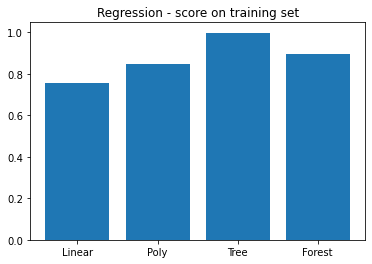

Linear	- 0.7564442316444236
Poly	- 0.8491634068446094
Tree	- 0.9988847057434221
Forest	- 0.8948410479202225


In [27]:
bars = ('Linear', 'Poly', 'Tree', 'Forest')
y_pos = np.arange(len(bars))

values = [reg_str, poly_reg_str, tree_str, forest_str]
plt.bar(y_pos, values)
plt.xticks(y_pos, bars)
plt.title("Regression - score on training set")
plt.show()

for i in range(0,4):
  print(str(bars[i]) + "\t- " + str(values[i]))

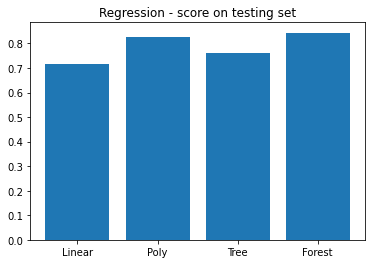

Linear	- 0.716762211137892
Poly	- 0.8250608350961726
Tree	- 0.761724544426714
Forest	- 0.843816105198895


In [28]:
values = [reg_ste, poly_reg_ste, tree_ste, forest_ste]
plt.bar(y_pos, values)
plt.xticks(y_pos, bars)
plt.title("Regression - score on testing set")
plt.show()

for i in range(0,4):
  print(str(bars[i]) + "\t- " + str(values[i]))

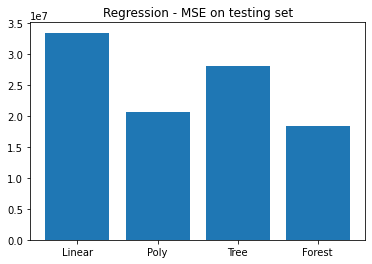

Linear	- 33447093.51745728
Poly	- 20658283.740708087
Tree	- 28137564.120564345
Forest	- 18443504.153594688


In [29]:
values = [reg_mse, poly_reg_mse, tree_mse, forest_mse]
plt.bar(y_pos, values)
plt.xticks(y_pos, bars)
plt.title("Regression - MSE on testing set")
plt.show()

for i in range(0,4):
  print(str(bars[i]) + "\t- " + str(values[i]))

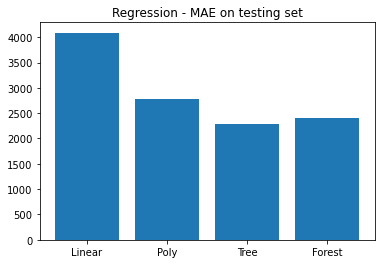

Linear	- 4088.363964685509
Poly	- 2786.6326711434062
Tree	- 2276.8652235820896
Forest	- 2396.9706034443902


In [30]:
values = [reg_mae, poly_reg_mae, tree_mae, forest_mae]
plt.bar(y_pos, values)
plt.xticks(y_pos, bars)
plt.title("Regression - MAE on testing set")
plt.show()

for i in range(0,4):
  print(str(bars[i]) + "\t- " + str(values[i]))

## Model

In [31]:
import joblib
joblib.dump(forestRegressor, "cost_predictor")
joblib.dump(sc, "scaler")

['scaler']

### Load model from file

In [32]:
model = joblib.load("cost_predictor")
sc = joblib.load("scaler")